In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np 

## Example to generate dataset for Seq2Seq model

### a) Tokenize the data

In [2]:
data = "No want of conscience hold it that I call \n Her love for whose dear love I rise and fall."

tokenizer = Tokenizer()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 # 1 is addwed to consider out of vocabulary word

print(tokenizer.word_index)
print("Corpos length:", total_words)

{'i': 1, 'love': 2, 'no': 3, 'want': 4, 'of': 5, 'conscience': 6, 'hold': 7, 'it': 8, 'that': 9, 'call': 10, 'her': 11, 'for': 12, 'whose': 13, 'dear': 14, 'rise': 15, 'and': 16, 'fall': 17}
Corpos length: 18


### b) Create n grams from the sequence

In [3]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    print("Sentence token:", token_list)
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        print(n_gram_sequence)
        input_sequences.append(n_gram_sequence)

Sentence token: [3, 4, 5, 6, 7, 8, 9, 1, 10]
[3, 4]
[3, 4, 5]
[3, 4, 5, 6]
[3, 4, 5, 6, 7]
[3, 4, 5, 6, 7, 8]
[3, 4, 5, 6, 7, 8, 9]
[3, 4, 5, 6, 7, 8, 9, 1]
[3, 4, 5, 6, 7, 8, 9, 1, 10]
Sentence token: [11, 2, 12, 13, 14, 2, 1, 15, 16, 17]
[11, 2]
[11, 2, 12]
[11, 2, 12, 13]
[11, 2, 12, 13, 14]
[11, 2, 12, 13, 14, 2]
[11, 2, 12, 13, 14, 2, 1]
[11, 2, 12, 13, 14, 2, 1, 15]
[11, 2, 12, 13, 14, 2, 1, 15, 16]
[11, 2, 12, 13, 14, 2, 1, 15, 16, 17]


### c) Pad the sequences with the longest sentence in the corpus

In [4]:
# Find length of longest sentence in the corpus
max_sequence_len = max([len(x) for x in input_sequences])
# pad sequences 
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences)

[[ 0  0  0  0  0  0  0  0  3  4]
 [ 0  0  0  0  0  0  0  3  4  5]
 [ 0  0  0  0  0  0  3  4  5  6]
 [ 0  0  0  0  0  3  4  5  6  7]
 [ 0  0  0  0  3  4  5  6  7  8]
 [ 0  0  0  3  4  5  6  7  8  9]
 [ 0  0  3  4  5  6  7  8  9  1]
 [ 0  3  4  5  6  7  8  9  1 10]
 [ 0  0  0  0  0  0  0  0 11  2]
 [ 0  0  0  0  0  0  0 11  2 12]
 [ 0  0  0  0  0  0 11  2 12 13]
 [ 0  0  0  0  0 11  2 12 13 14]
 [ 0  0  0  0 11  2 12 13 14  2]
 [ 0  0  0 11  2 12 13 14  2  1]
 [ 0  0 11  2 12 13 14  2  1 15]
 [ 0 11  2 12 13 14  2  1 15 16]
 [11  2 12 13 14  2  1 15 16 17]]


### d) Create input and output for the sec2sec model

In [12]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
predictors, label

(array([[ 0,  0,  0,  0,  0,  0,  0,  0,  3],
        [ 0,  0,  0,  0,  0,  0,  0,  3,  4],
        [ 0,  0,  0,  0,  0,  0,  3,  4,  5],
        [ 0,  0,  0,  0,  0,  3,  4,  5,  6],
        [ 0,  0,  0,  0,  3,  4,  5,  6,  7],
        [ 0,  0,  0,  3,  4,  5,  6,  7,  8],
        [ 0,  0,  3,  4,  5,  6,  7,  8,  9],
        [ 0,  3,  4,  5,  6,  7,  8,  9,  1],
        [ 0,  0,  0,  0,  0,  0,  0,  0, 11],
        [ 0,  0,  0,  0,  0,  0,  0, 11,  2],
        [ 0,  0,  0,  0,  0,  0, 11,  2, 12],
        [ 0,  0,  0,  0,  0, 11,  2, 12, 13],
        [ 0,  0,  0,  0, 11,  2, 12, 13, 14],
        [ 0,  0,  0, 11,  2, 12, 13, 14,  2],
        [ 0,  0, 11,  2, 12, 13, 14,  2,  1],
        [ 0, 11,  2, 12, 13, 14,  2,  1, 15],
        [11,  2, 12, 13, 14,  2,  1, 15, 16]]),
 array([ 4,  5,  6,  7,  8,  9,  1, 10,  2, 12, 13, 14,  2,  1, 15, 16, 17]))

### e) One-hot encoding of labels

In [13]:
label = ku.to_categorical(label, num_classes=total_words)

In [14]:
label[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)

## Working on real data

get data from https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt

### Create input and output for the data

In [15]:
tokenizer = Tokenizer()
data = open('sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

### Create model

In [16]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

### Fit the model

In [17]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 46s 3ms/sample - loss: 6.9098 - accuracy: 0.0221
Epoch 2/100
15462/15462 [==============================] - 36s 2ms/sample - loss: 6.5011 - accuracy: 0.0230
Epoch 3/100
15462/15462 [==============================] - 34s 2ms/sample - loss: 6.4057 - accuracy: 0.0246
Epoch 4/100
15462/15462 [==============================] - 34s 2ms/sample - loss: 6.2791 - accuracy: 0.0302
Epoch 5/100
15462/15462 [==============================] - 32s 2ms/sample - loss: 6.1833 - accuracy: 0.0349
Epoch 6/100
15462/15462 [==============================] - 34s 2ms/sample - loss: 6.1025 - accuracy: 0.0396
Epoch 7/100
15462/15462 [==============================] - 37s 2ms/sample - loss: 6.0248 - accuracy: 0.0409
Epoch 8/100
15462/15462 [==============================] - 37s 2ms/sample - loss: 5.9325 - accuracy: 0.0442
Epoch 9/100
15462/15462 [==============================] - 37s 2ms/sample - loss: 5.8285 - accuracy: 0.0492
Epoch

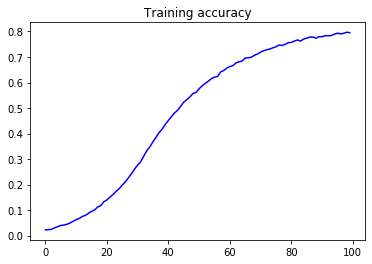

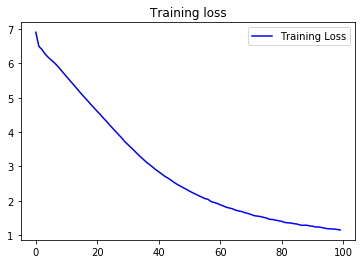

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

### Predict the text

In [19]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope with some place on meetness meetness brow part go and arising dumb tongue arising tongue tongue tongue tongue you will are seen his compeers on scope hath dote curious days go bettering days go new days go pain ' go well well strife lease did lie me so great part bright thine ' lies thee live great cause of me in this age be bright bring foes none groan ' live none chary dearer dearer seen groan prove thee back seen kill'd strive to prove twain decay go back arising bow expire green me live bright bright show thee thine
